# **Step 1: Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 2: Clone the GitHub Repository**

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 27.71 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━

# **Step 3: Organize Dataset into Training and Validation Folders**

In [ ]:
import os, shutil
import random

src_dir = '/content/drive/MyDrive/MBL 559E - Group Project/Fifth Test/paired_images'
train_dir = '/content/pytorch-CycleGAN-and-pix2pix/datasets/yalihouse/train/'
val_dir = '/content/pytorch-CycleGAN-and-pix2pix/datasets/yalihouse/val/'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

files = [f for f in os.listdir(src_dir) if f.endswith('.png')]
random.shuffle(files)

split_idx = int(0.9 * len(files))  # 90% train, 10% val
train_files = files[:split_idx]
val_files = files[split_idx:]

for f in train_files:
    shutil.copy(os.path.join(src_dir, f), os.path.join(train_dir, f))
for f in val_files:
    shutil.copy(os.path.join(src_dir, f), os.path.join(val_dir, f))

print(f"Copied {len(train_files)} to train, {len(val_files)} to val.")


Copied 1481 to train, 165 to val.


# **Step 4: Train the Pix2Pix Model**

In [ ]:
!df -h
!nvidia-smi

Filesystem      Size  Used Avail Use% Mounted on
overlay         236G   46G  191G  20% /
tmpfs            64M     0   64M   0% /dev
shm              41G     0   41G   0% /dev/shm
/dev/root       2.0G  1.2G  775M  61% /usr/sbin/docker-init
tmpfs            42G  256K   42G   1% /var/colab
/dev/sda1       242G   68G  175G  29% /kaggle/input
tmpfs            42G     0   42G   0% /proc/acpi
tmpfs            42G     0   42G   0% /proc/scsi
tmpfs            42G     0   42G   0% /sys/firmware
drive           236G   55G  181G  24% /content/drive
Fri Jun 13 21:35:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Mem

In [ ]:
%cd /content/pytorch-CycleGAN-and-pix2pix
!python train.py --dataroot datasets/yalihouse --name yalihouse_pix2pix --model pix2pix --direction AtoB --batch_size 8 --n_epochs 100

/content/pytorch-CycleGAN-and-pix2pix
----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: datasets/yalihouse            	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    e

# **Step 5: Test the Pix2Pix Model**

In [ ]:
%cd /content/pytorch-CycleGAN-and-pix2pix
!python test.py --dataroot datasets/yalihouse --name yalihouse_pix2pix --model pix2pix --direction AtoB --phase val --num_test 50


/content/pytorch-CycleGAN-and-pix2pix
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/yalihouse            	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

# **Step 6: Visualize the Results**

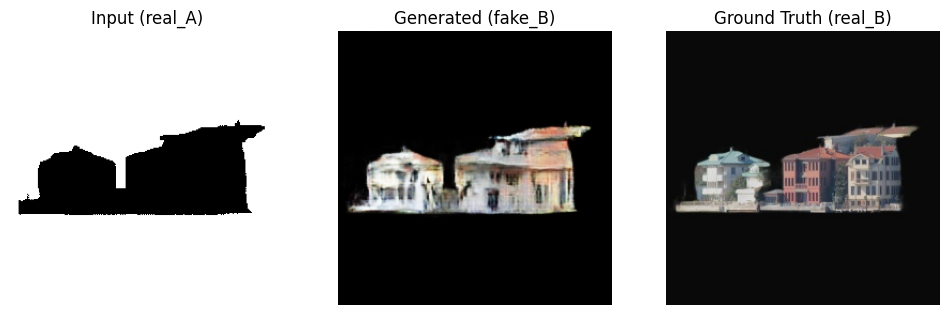

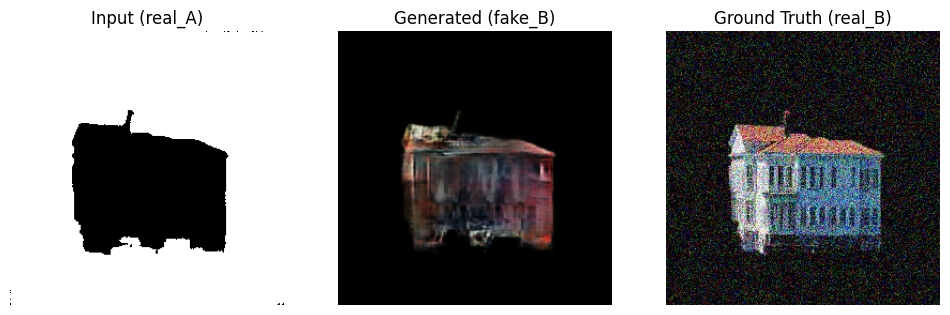

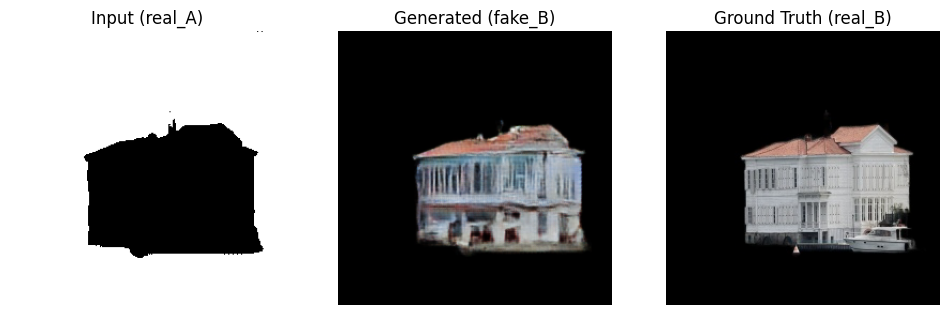

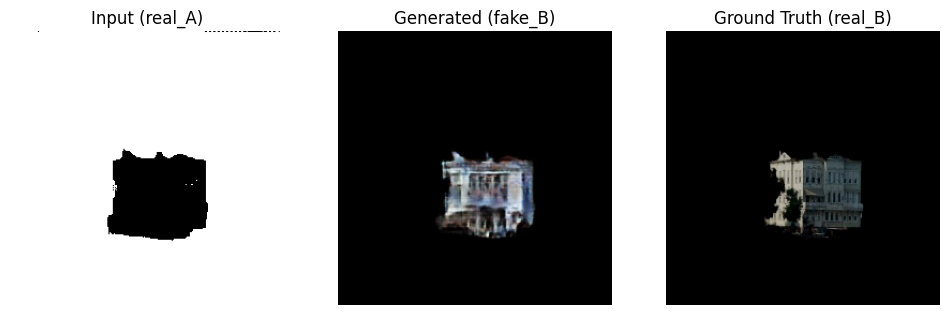

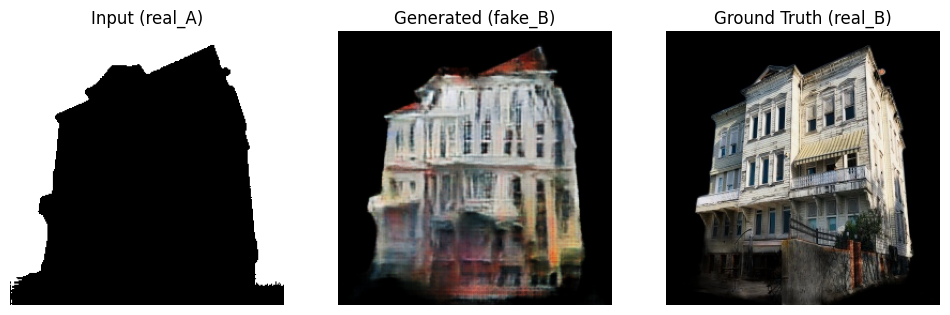

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

result_dir = '/content/pytorch-CycleGAN-and-pix2pix/results/yalihouse_pix2pix/val_latest/images/'

files = sorted([f for f in os.listdir(result_dir) if f.endswith('_fake_B.png')])

for fake_name in files[:5]:
    prefix = fake_name.replace('_fake_B.png', '')
    real_A = prefix + '_real_A.png'
    real_B = prefix + '_real_B.png'

    fake_path = os.path.join(result_dir, fake_name)
    real_A_path = os.path.join(result_dir, real_A)
    real_B_path = os.path.join(result_dir, real_B)

    img_fake = cv2.imread(fake_path)
    img_real_A = cv2.imread(real_A_path)
    img_real_B = cv2.imread(real_B_path)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(cv2.cvtColor(img_real_A, cv2.COLOR_BGR2RGB)); axs[0].set_title('Input (real_A)')
    axs[1].imshow(cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB)); axs[1].set_title('Generated (fake_B)')
    axs[2].imshow(cv2.cvtColor(img_real_B, cv2.COLOR_BGR2RGB)); axs[2].set_title('Ground Truth (real_B)')
    for ax in axs: ax.axis('off')
    plt.show()



# **Step 7: Plot GAN Traininig Losses Over Time**

In [ ]:
import os
print(os.path.exists('/content/pytorch-CycleGAN-and-pix2pix/checkpoints/yalihouse_pix2pix/loss_log.txt'))
with open('/content/pytorch-CycleGAN-and-pix2pix/checkpoints/yalihouse_pix2pix/loss_log.txt') as f:
    print(f.readlines()[:10])  # See first 10 lines

True
['================ Training Loss (Fri Jun 13 20:55:23 2025) ================\n', '(epoch: 1, iters: 200, time: 0.004, data: 0.240) G_GAN: 1.489 G_L1: 31.419 D_real: 0.663 D_fake: 0.356 \n', '(epoch: 1, iters: 400, time: 0.017, data: 0.003) G_GAN: 1.773 G_L1: 19.295 D_real: 0.405 D_fake: 0.712 \n', '(epoch: 1, iters: 600, time: 0.004, data: 0.003) G_GAN: 1.696 G_L1: 18.488 D_real: 0.247 D_fake: 0.815 \n', '(epoch: 1, iters: 800, time: 0.010, data: 0.004) G_GAN: 1.141 G_L1: 15.529 D_real: 0.467 D_fake: 0.974 \n', '(epoch: 1, iters: 1000, time: 0.004, data: 0.003) G_GAN: 2.312 G_L1: 15.565 D_real: 0.181 D_fake: 0.134 \n', '(epoch: 1, iters: 1200, time: 0.009, data: 0.003) G_GAN: 2.362 G_L1: 17.131 D_real: 0.166 D_fake: 0.167 \n', '(epoch: 1, iters: 1400, time: 0.004, data: 0.003) G_GAN: 2.033 G_L1: 16.059 D_real: 0.128 D_fake: 0.439 \n', '(epoch: 2, iters: 112, time: 0.016, data: 0.003) G_GAN: 1.712 G_L1: 18.459 D_real: 0.101 D_fake: 0.343 \n', '(epoch: 2, iters: 312, time: 0.004, da

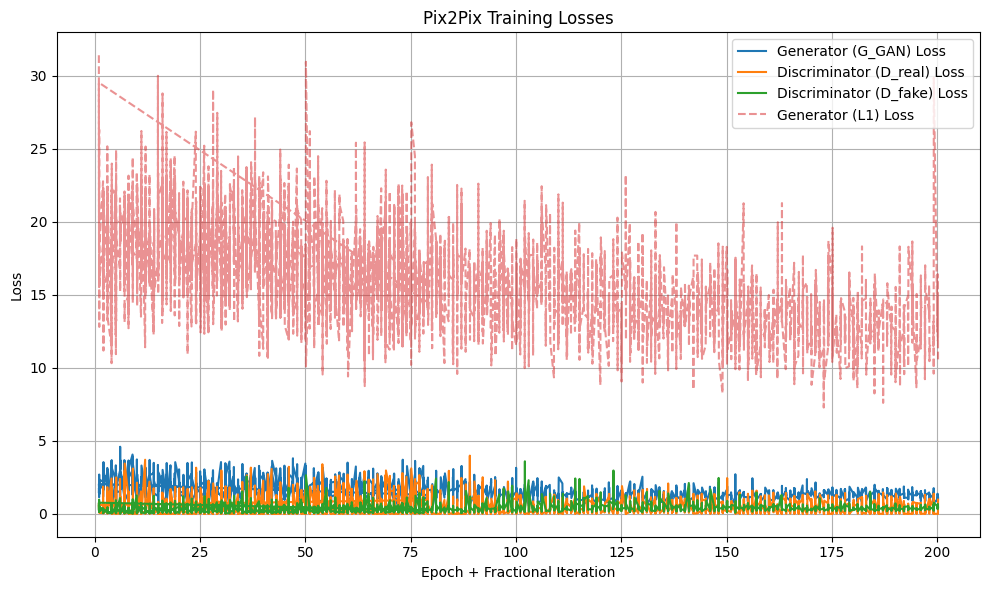

In [ ]:
import matplotlib.pyplot as plt

logfile = '/content/pytorch-CycleGAN-and-pix2pix/checkpoints/yalihouse_pix2pix/loss_log.txt'

g_gan, d_real, d_fake, g_l1, steps = [], [], [], [], []
with open(logfile, 'r') as f:
    for line in f:
        if line.startswith('(epoch:'):
            # Example line:
            # (epoch: 1, iters: 200, time: 0.004, data: 0.240) G_GAN: 1.489 G_L1: 31.419 D_real: 0.630 D_fake: 1.315
            try:
                # Remove parenthesis and split
                parts = line.replace('(', '').replace(')', '').replace(',', '').split()
                epoch = int(parts[1])
                iters = int(parts[3])
                g_gan_val = float(parts[9])
                g_l1_val = float(parts[11])
                d_real_val = float(parts[13])
                d_fake_val = float(parts[15])
                step = epoch + iters / 10000  # Fractional step
                steps.append(step)
                g_gan.append(g_gan_val)
                d_real.append(d_real_val)
                d_fake.append(d_fake_val)
                g_l1.append(g_l1_val)
            except Exception as e:
                print("Could not parse line:", line)
                print(e)

plt.figure(figsize=(10,6))
plt.plot(steps, g_gan, label='Generator (G_GAN) Loss')
plt.plot(steps, d_real, label='Discriminator (D_real) Loss')
plt.plot(steps, d_fake, label='Discriminator (D_fake) Loss')
plt.plot(steps, g_l1, label='Generator (L1) Loss', linestyle='--', alpha=0.5)
plt.xlabel('Epoch + Fractional Iteration')
plt.ylabel('Loss')
plt.title('Pix2Pix Training Losses')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# **Step 8: Export Generated Images as ZIP File**

In [ ]:
import shutil

# Path to your generated images
result_dir = '/content/pytorch-CycleGAN-and-pix2pix/results/yalihouse_pix2pix/val_latest/images'
zip_path = '/content/yalihouse_pix2pix_generated_images.zip'

# Make the zip file
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', result_dir)
print(f"Created ZIP file at: {zip_path}")

Created ZIP file at: /content/yalihouse_pix2pix_generated_images.zip


# **Step 9:Evaluation Scores**

**Step 9.1:SSIM Score**

In [ ]:
import os

# Directory where Pix2Pix (Zhu et al.) puts generated images
result_dir = '/content/pytorch-CycleGAN-and-pix2pix/results/yalihouse_pix2pix/val_latest/images'

# Collect pairs: (generated, real)
pairs = []
for fname in sorted(os.listdir(result_dir)):
    if fname.endswith('_fake_B.png') or fname.endswith('_fake_B.jpg'):
        base = fname.replace('_fake_B.png', '').replace('_fake_B.jpg', '')
        # Try to find the matching real image
        for ext in ['.png', '.jpg']:
            real_name = base + '_real_B' + ext
            real_path = os.path.join(result_dir, real_name)
            gen_path = os.path.join(result_dir, fname)
            if os.path.exists(real_path):
                pairs.append((gen_path, real_path))
                break

print(f"Found {len(pairs)} valid pairs for metric computation.")

Found 50 valid pairs for metric computation.


In [ ]:
import cv2
from skimage.metrics import structural_similarity as ssim

ssim_scores = []
for gen_path, real_path in pairs:
    img_gen = cv2.imread(gen_path)
    img_real = cv2.imread(real_path)
    if img_gen is None or img_real is None:
        continue

    # Resize real to match generated if needed
    if img_gen.shape != img_real.shape:
        img_real = cv2.resize(img_real, (img_gen.shape[1], img_gen.shape[0]))
    score = ssim(img_gen, img_real, channel_axis=-1)
    ssim_scores.append(score)

if ssim_scores:
    print(f"Average SSIM over {len(ssim_scores)} pairs: {sum(ssim_scores)/len(ssim_scores):.4f}")
else:
    print("No valid SSIM scores calculated.")

Average SSIM over 50 pairs: 0.5657


**Step 9.2:FID Score**

In [ ]:
!pip install pytorch-fid

In [ ]:
import os
import shutil

result_dir = '/content/pytorch-CycleGAN-and-pix2pix/results/yalihouse_pix2pix/val_latest/images'
gen_dir = '/content/gen'
real_dir = '/content/real'

os.makedirs(gen_dir, exist_ok=True)
os.makedirs(real_dir, exist_ok=True)

for f in os.listdir(result_dir):
    if f.endswith('_fake_B.png') or f.endswith('_fake_B.jpg'):
        shutil.copy(os.path.join(result_dir, f), os.path.join(gen_dir, f))
    elif f.endswith('_real_B.png') or f.endswith('_real_B.jpg'):
        shutil.copy(os.path.join(result_dir, f), os.path.join(real_dir, f))

In [ ]:
!python -m pytorch_fid /content/gen /content/real

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:00<00:00, 180MB/s]
100% 1/1 [00:00<00:00,  1.37it/s]
100% 1/1 [00:00<00:00,  2.79it/s]
FID:  154.30300462091415


**Step 9.3:CLIP Score**

In [27]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-aus57p55
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-aus57p55
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [28]:
import os
import torch
import clip
from PIL import Image
from tqdm import tqdm

# Path to your generated images (adjust if needed)
img_dir = '/content/pytorch-CycleGAN-and-pix2pix/results/yalihouse_pix2pix/val_latest/images'

# CLIP setup
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Your prompt
prompt = "Istanbul Bosphorus Waterfront Houses"
text = clip.tokenize([prompt]).to(device)

# Calculate CLIP scores
scores = []
for fname in tqdm(sorted(os.listdir(img_dir))):
    if fname.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(img_dir, fname)
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)
            similarity = (image_features @ text_features.T).item()
            scores.append(similarity)

if scores:
    print(f"CLIP Score for '{prompt}': {sum(scores)/len(scores):.4f} (average over {len(scores)} images)")
else:
    print("No images found for CLIP scoring.")

100%|██████████| 150/150 [00:03<00:00, 37.54it/s]

CLIP Score for 'Istanbul Bosphorus Waterfront Houses': 0.2249 (average over 150 images)
